In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
index = ['2018', '2019', '2020']

In [3]:
# 가정 판매 발전량
p = pd.read_csv('./HOME_발전·판매_발전량_전원별.csv',  encoding = 'cp949').iloc[1:,:].loc[:,['연도', '원자력', '신재생']]

sale_electric = p.set_index(p.연도.astype('int64'))

series_electric = sale_electric['원자력']
series_eco = sale_electric['신재생']
sale_electric = sale_electric.iloc[:,1:]

In [25]:
sale_electric

,원자력,신재생
연도,,
2020,160183721.0,31056508.00
2019,145909669.5,30526256.64
2018,133505261.0,27176674.00


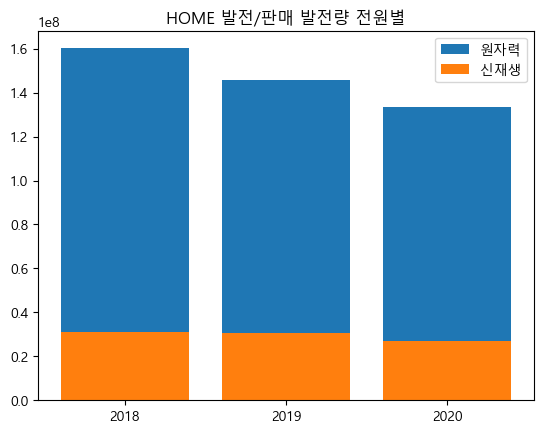

In [4]:
plt.title('HOME 발전/판매 발전량 전원별')

plt.bar(index, sale_electric.원자력, label = '원자력')
plt.bar(index, sale_electric.신재생, label = '신재생')
plt.xticks(index)
plt.legend(loc='best')

plt.show()

In [5]:
region1 = input('지역1 : ')

dicRigion = {'부산시' : '부산', '강원도' : '대관령', '경기도' : '수원', '경상남도' : '거창', '경상북도' : '포항', '울산시' : '울산'
             , '인천시':'인천', '전라남도':'완도','전라북도' : '군산', '충청남도' : '금산', '제주도' : '제주'}
# 부산시 - 부산 / 강원도-대관령, 경기도 -  수원/ 경상남도 - 거창,양산시,의령군/ 경상북도 - 울진, 포항/ 울산시 - 울산
#인천시 - 인천/ 전라남도 - 완도, 영광군 / 전라북도 - 군산, 부안/ 충청남도 - 금산 / 제주도 - 제주

# 인천시/울산시/ 강원도(대관령)/ 제주도/ 제주
region2 = dicRigion[region1]

지역1 : 강원도


In [6]:
e = pd.read_csv('./한국전력거래소_시간별 풍력발전량_20211231.csv',  encoding = 'cp949')

#년,월,일 사용 복사
eYear = e.copy()
eMonth = e.copy()
eDay = e.copy()

In [7]:
def changeYearDate(x):
    if (x >= '2018-01-01') & (x <= '2018-12-31'):
        return '2018'
    elif (x >= '2019-01-01') & (x <= '2019-12-31'):
        return '2019'
    elif (x >= '2020-01-01') & (x <= '2020-12-31'):
        return '2020'
    else:
        return '9999'
    
eYear['거래일자'] = eYear['거래일자'].apply(changeYearDate)

In [26]:
eYear

,거래일자,거래시간,지역,발전량
0,2018,1,강원도,143991
1,2018,2,강원도,142730
2,2018,3,강원도,134797
3,2018,4,강원도,127599
4,2018,5,강원도,134102
...,...,...,...,...
385699,9999,20,충청남도,0
385700,9999,21,충청남도,5
385701,9999,22,충청남도,0
385702,9999,23,충청남도,0


In [8]:
sYear = eYear[eYear.지역 == region1].groupby(['거래일자','지역']).발전량.sum()
sYear.reset_index()
# 2018~2020년 데이터
dpYear =pd.DataFrame(sYear.iloc[:3])

In [27]:
dpYear

,,발전량
거래일자,지역,
2018,강원도,689553392
2019,강원도,688176837
2020,강원도,776578824


In [9]:
#wind - year
wYear = pd.read_csv('./OBS_ASOS_ANL_20230610122722_y.csv',  encoding = 'cp949')
wYear = wYear.loc[wYear.지점명 == region2]

In [28]:
wYear

,지점,지점명,일시,평균 풍속(m/s),최다 풍향(16방위)
15,100,대관령,2018,3.5,270
16,100,대관령,2019,2.9,270
17,100,대관령,2020,3.1,270


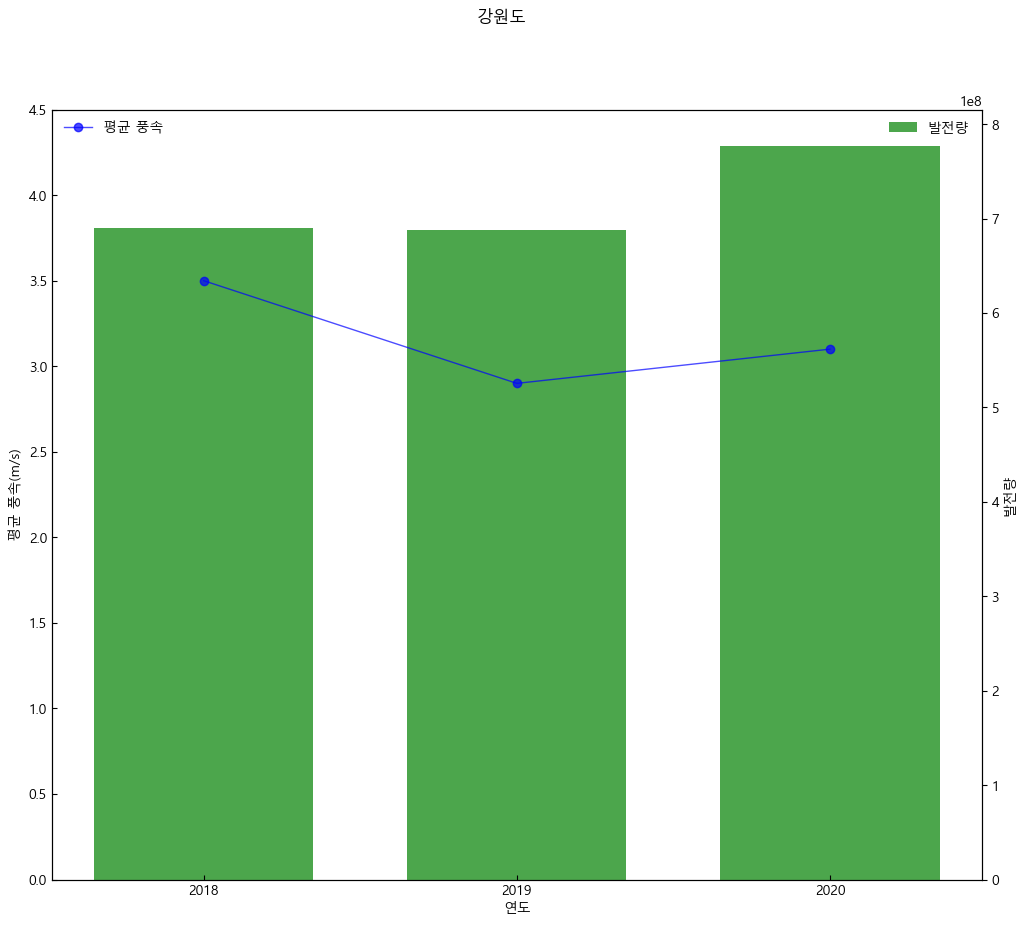

In [10]:
fix, ax1 = plt.subplots()

fix.suptitle(region1)
fix.set_size_inches(12,10)

#꺽은선
ax1.plot(index, wYear['평균 풍속(m/s)'], color = 'blue',alpha = 0.7,linewidth = 1,marker='o', label= '평균 풍속')
ax1.set_ylim(0,wYear['평균 풍속(m/s)'].max()+1)
ax1.set_xlabel('연도')
ax1.set_ylabel('평균 풍속(m/s)')
ax1.tick_params(axis = 'both', direction= 'in')
ax1.legend(loc='upper left',frameon = False)

#막대
ax2 = ax1.twinx()
ax2.bar(index, dpYear['발전량'], color = 'green', alpha = 0.7, width = 0.7, label = '발전량')
ax2.set_ylabel('발전량')
ax2.legend(loc='upper right',frameon = False)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

plt.show()

In [11]:
def changeMonthDate(x):
    return x[:7]

eMonth['거래일자'] = eMonth['거래일자'].apply(changeMonthDate)
sMonth = eMonth[(eMonth.거래일자 >= '2018-01') & (eMonth.거래일자 <= '2020-12') & (eMonth.지역 == region1)]
dpMonth =pd.DataFrame(sMonth.groupby('거래일자').발전량.sum())

In [30]:
dpMonth

,발전량
거래일자,
2018-01,73899755
2018-02,71492624
2018-03,76143558
2018-04,75111453
2018-05,59892853
2018-06,31503434
2018-07,42056227
2018-08,39494818
2018-09,43408783


In [12]:
wMonth = pd.read_csv('./OBS_ASOS_MNH_20230610122347_m.csv',  encoding = 'cp949')
wMonth = wMonth.iloc[:,[1,2,3,4]][wMonth.지점명 == region2]

In [31]:
wMonth

,지점명,일시,평균풍속(m/s),최대풍속(m/s)
180,대관령,2018-01,4.7,14.1
181,대관령,2018-02,4.8,13.1
182,대관령,2018-03,4.3,16.5
183,대관령,2018-04,4.3,14.2
184,대관령,2018-05,3.8,14.2
185,대관령,2018-06,2.7,12.0
186,대관령,2018-07,2.9,9.7
187,대관령,2018-08,2.6,10.6
188,대관령,2018-09,2.4,10.7
189,대관령,2018-10,3.3,14.3


In [14]:
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

temp = dpMonth.index

s1 = wMonth[wMonth.일시 <= '2018-12']['평균풍속(m/s)']
s2 = wMonth[(wMonth.일시 >= '2019-01') & (wMonth.일시 <= '2019-12')]['평균풍속(m/s)']
s3 = wMonth[wMonth.일시 >= '2020-01']['평균풍속(m/s)']

ss1 = wMonth[wMonth.일시 <= '2018-12']['최대풍속(m/s)']
ss2 = wMonth[(wMonth.일시 >= '2019-01') & (wMonth.일시 <= '2019-12')]['최대풍속(m/s)']
ss3 = wMonth[wMonth.일시 >= '2020-01']['최대풍속(m/s)']

dpMonth1 = dpMonth.loc[list(filter(lambda x:'2018' in x, temp))]
dpMonth2 = dpMonth.loc[list(filter(lambda x:'2019' in x, temp))]
dpMonth3 = dpMonth.loc[list(filter(lambda x:'2020' in x, temp))]

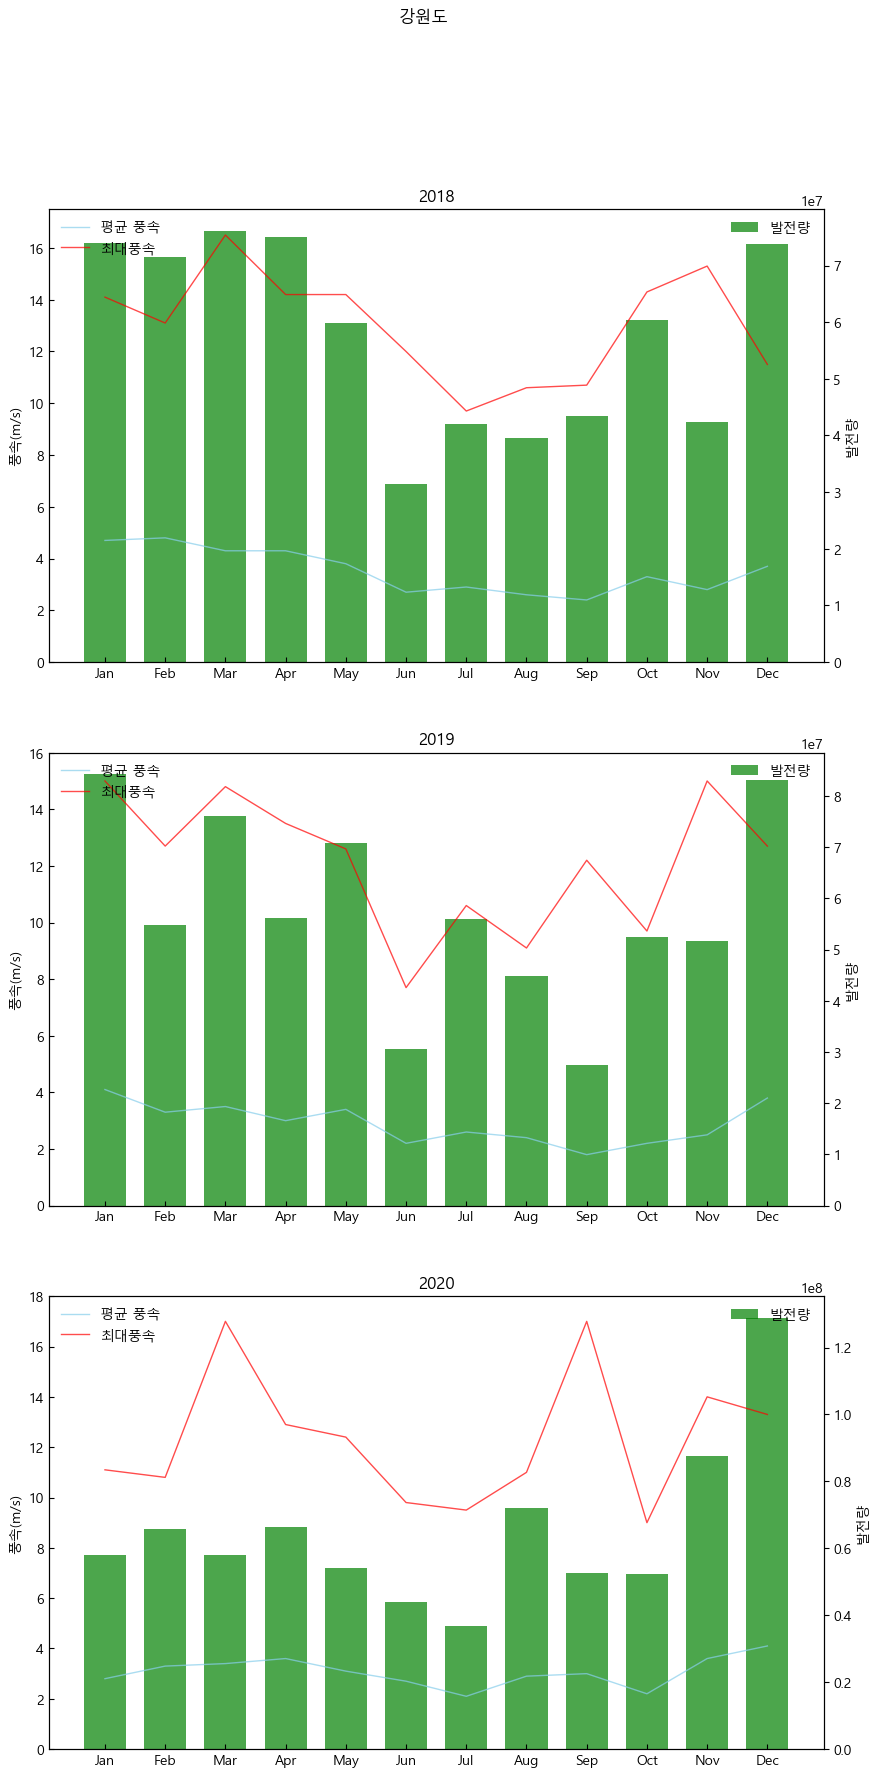

In [16]:
fix, ax = plt.subplots(3,1)
fix.suptitle(region1)
fix.set_size_inches(10,20)

ax[0].set_title('2018')
ax[0].plot(x, s1, color = 'skyblue',alpha = 0.7,linewidth = 1, label= '평균 풍속')
ax[0].set_ylim(0, ss1.max()+1)
#ax[0].set_xlabel('연도')
ax[0].set_ylabel('풍속(m/s)')
ax[0].tick_params(axis = 'both', direction= 'in')

ax1 = ax[0].twinx()
ax1.bar(x, dpMonth1['발전량'], color = 'green', alpha = 0.7, width = 0.7, label = '발전량')
#ax2.set_ylim()
ax1.set_ylabel('발전량')
ax[0].plot(x, ss1, color = 'red', alpha = 0.7, linewidth = 1, label = '최대풍속')

ax[0].set_zorder(ax1.get_zorder() + 10)
ax[0].patch.set_visible(False)

ax[0].legend(loc='upper left',frameon = False)
ax1.legend(loc='upper right',frameon = False)

## 2019
ax[1].set_title('2019')
ax[1].plot(x, s2, color = 'skyblue',alpha = 0.7,linewidth = 1, label= '평균 풍속')
ax[1].set_ylim(0, ss2.max()+1)
#ax[1].set_xlabel('연도')
ax[1].set_ylabel('풍속(m/s)')
ax[1].tick_params(axis = 'both', direction= 'in')

ax2 = ax[1].twinx()
ax2.bar(x, dpMonth2['발전량'], color = 'green', alpha = 0.7, width = 0.7, label = '발전량')
#ax2.set_ylim()

ax[1].plot(x, ss2, color = 'red', alpha = 0.7, linewidth = 1, label = '최대풍속')

ax[1].set_zorder(ax2.get_zorder() + 10)
ax[1].patch.set_visible(False)

ax[1].legend(loc='upper left',frameon = False)
ax2.set_ylabel('발전량')

ax[1].set_zorder(ax1.get_zorder() + 10)
ax[1].patch.set_visible(False)

ax[1].legend(loc='upper left',frameon = False)
ax2.legend(loc='upper right',frameon = False)

## 2020
ax[2].set_title('2020')
ax[2].plot(x, s3, color = 'skyblue',alpha = 0.7,linewidth = 1, label= '평균 풍속')
ax[2].set_ylim(0, ss3.max()+1)
#ax[2].set_xlabel('연도')
ax[2].set_ylabel('풍속(m/s)')
ax[2].tick_params(axis = 'both', direction= 'in')

ax3 = ax[2].twinx()
ax3.bar(x, dpMonth3['발전량'], color = 'green', alpha = 0.7, width = 0.7, label = '발전량')
#ax2.set_ylim()
ax3.set_ylabel('발전량')

ax[2].set_zorder(ax1.get_zorder() + 10)
ax[2].patch.set_visible(False)

ax[2].legend(loc='upper left',frameon = False)
ax3.legend(loc='upper right',frameon = False)

ax[2].plot(x, ss3, color = 'red', alpha = 0.7, linewidth = 1, label = '최대풍속')
ax[2].set_zorder(ax3.get_zorder() + 10)
ax[2].patch.set_visible(False)

ax[2].legend(loc='upper left',frameon = False)

#plt.subplots_adjust(hspace = 0)
plt.show()

C:\Users\UserK\AppData\Local\Temp\ipykernel_2780\3914866360.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(x)
C:\Users\UserK\AppData\Local\Temp\ipykernel_2780\3914866360.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(x)
C:\Users\UserK\AppData\Local\Temp\ipykernel_2780\3914866360.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(x)


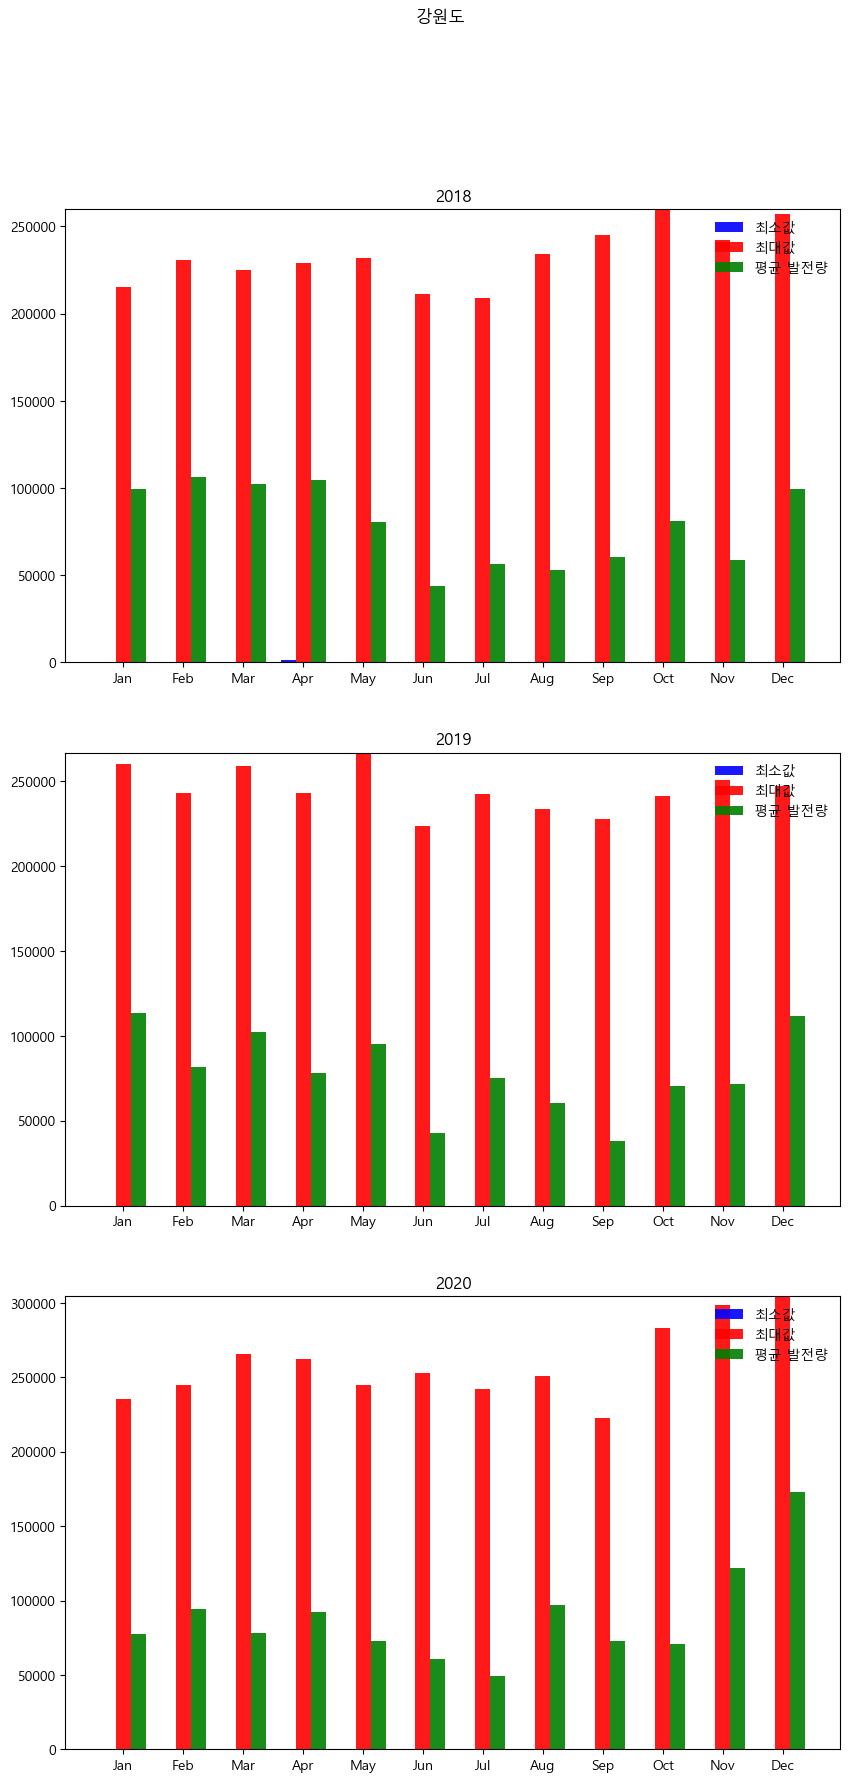

In [48]:
## 평균

#def changeDate(x):
#    return x[:7]

#eMonth['거래일자'] = e['거래일자'].apply(changeDate)
#z = eMonth[(eMonth.거래일자 >= '2018-01') & (eMonth.거래일자 <= '2020-12') & (eMonth.지역 == region1)]

dpMean =pd.DataFrame(sMonth.groupby('거래일자').발전량.agg(['min', 'max', 'mean']))
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

temp = dpMean.index

dpMean1 = dpMean.loc[list(filter(lambda x:'2018' in x, temp))]
dpMean2 = dpMean.loc[list(filter(lambda x:'2019' in x, temp))]
dpMean3 = dpMean.loc[list(filter(lambda x:'2020' in x, temp))]

fix, ax = plt.subplots(3,1)
fix.suptitle(region1)
fix.set_size_inches(10,20)

bar_width = 0.25

index =  np.arange(12)
ax[0].set_title('2018')
ax[0].bar(index, dpMean1.iloc[:,0], color = 'blue', alpha = 0.9, width = bar_width, label = '최소값')
ax[0].bar(index + bar_width, dpMean1.iloc[:,1], color = 'red', alpha = 0.9, width = bar_width, label = '최대값')
ax[0].bar(index + 2 * bar_width, dpMean1.iloc[:,2], color = 'green', alpha = 0.9, width = bar_width, label = '평균 발전량')
ax[0].legend(loc='upper right',frameon = False)
ax[0].set_ylim(0, dpMean1.iloc[:,1].max()+1)
ax[0].set_xticklabels(x)
ax[0].set_xticks(np.arange(bar_width, 12 + bar_width, 1))

## 2019
ax[1].set_title('2019')
ax[1].bar(index, dpMean2.iloc[:,0], color = 'blue', alpha = 0.9, width = bar_width, label = '최소값')
ax[1].bar(index + bar_width, dpMean2.iloc[:,1], color = 'red', alpha = 0.9, width = bar_width, label = '최대값')
ax[1].bar(index + 2 * bar_width, dpMean2.iloc[:,2], color = 'green', alpha = 0.9, width = bar_width, label = '평균 발전량')
ax[1].legend(loc='upper right',frameon = False)
ax[1].set_ylim(0, dpMean2.iloc[:,1].max()+1)
ax[1].set_xticklabels(x)
ax[1].set_xticks(np.arange(bar_width, 12 + bar_width, 1))

## 2020
ax[2].set_title('2020')
ax[2].bar(index, dpMean3.iloc[:,0], color = 'blue', alpha = 0.9, width = bar_width, label = '최소값')
ax[2].bar(index + bar_width, dpMean3.iloc[:,1], color = 'red', alpha = 0.9, width = bar_width, label = '최대값')
ax[2].bar(index + 2 * bar_width, dpMean3.iloc[:,2], color = 'green', alpha = 0.9, width = bar_width, label = '평균 발전량')
ax[2].legend(loc='upper right',frameon = False)
ax[2].set_ylim(0, dpMean3.iloc[:,1].max()+1)
ax[2].set_xticklabels(x)
ax[2].set_xticks(np.arange(bar_width, 12 + bar_width, 1))

plt.show()

In [46]:
dpMean
sMonth

,거래일자,거래시간,지역,발전량
0,2018-01,1,강원도,143991
1,2018-01,2,강원도,142730
2,2018-01,3,강원도,134797
3,2018-01,4,강원도,127599
4,2018-01,5,강원도,134102
...,...,...,...,...
289099,2020-12,20,강원도,238543
289100,2020-12,21,강원도,225968
289101,2020-12,22,강원도,227715
289102,2020-12,23,강원도,236706


In [37]:
y = input('년 :')
m = input('월 :')
#d = input('일 :')

if len(m) < 2:
    m = '0'+m
  
#if len(d) < 2:
#    d = '0'+d
    
#date = y+'-'+m+'-'+d
date = y+'-'+m

년 :2019
월 :7


In [38]:
eDay = e[(e.지역 == region1)]
dpDay =pd.DataFrame(eDay.groupby('거래일자').발전량.sum())

wDay = pd.read_csv('./OBS_ASOS_DD_20230610121724_d.csv',  encoding = 'cp949')
wDay = wDay[(wDay.지점명 == region2)]

In [34]:
wDay

,지점,지점명,일시,최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다풍향(16방위)
5480,100,대관령,2018-01-01,12.6,270.0,1353.0,9.0,270.0,1357.0,5.1,4421.0,270.0
5481,100,대관령,2018-01-02,16.5,270.0,1233.0,9.5,270.0,1108.0,6.1,5301.0,270.0
5482,100,대관령,2018-01-03,8.1,270.0,1528.0,5.6,270.0,1252.0,2.8,2447.0,320.0
5483,100,대관령,2018-01-04,5.6,70.0,1350.0,3.8,90.0,1441.0,1.1,938.0,90.0
5484,100,대관령,2018-01-05,9.8,250.0,1443.0,7.2,270.0,1724.0,2.9,2484.0,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6571,100,대관령,2020-12-27,7.1,270.0,1400.0,4.4,270.0,1404.0,2.2,1940.0,270.0
6572,100,대관령,2020-12-28,6.1,250.0,947.0,3.9,290.0,353.0,1.8,1580.0,290.0
6573,100,대관령,2020-12-29,10.4,270.0,2148.0,6.3,270.0,2351.0,3.1,2717.0,250.0
6574,100,대관령,2020-12-30,17.4,270.0,2254.0,10.2,270.0,1418.0,6.1,5278.0,270.0


In [35]:
dpDay

,발전량
거래일자,
2018-01-01,3193717
2018-01-02,3591465
2018-01-03,871846
2018-01-04,317772
2018-01-05,1609228
...,...
2021-12-27,5863191
2021-12-28,6007251
2021-12-29,6563703


In [39]:
temp = dpDay.index
tempIndex = list(filter(lambda x:date in x, temp))
#dp.loc[list(filter(lambda x:'2018' in x, temp))]

s1 = wDay.loc[wDay.일시.isin(tempIndex)]['평균 풍속(m/s)']
ss1 = wDay.loc[wDay.일시.isin(tempIndex)]['풍정합(100m)']

dpDay1 = dpDay.loc[tempIndex]
dpDay1 = dpDay1.reset_index()
dpDay1['거래일자'] = dpDay1.거래일자.apply(lambda x:x[-2:len(x)])

x = dpDay1.거래일자

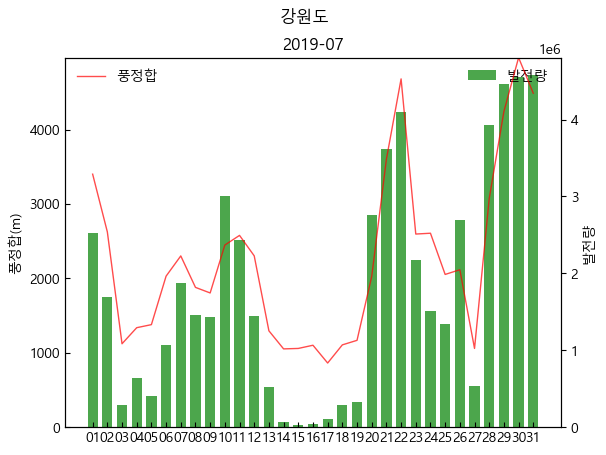

In [40]:
#특정 날짜
fix, ax = plt.subplots()
fix.suptitle(region1)
ax.set_title(date)
ax.set_ylim(0, ss1.max()+1)
ax.set_ylabel('풍정합(m)')
ax.tick_params(axis = 'both', direction= 'in')

ax1 = ax.twinx()
ax1.bar(x, dpDay1['발전량'], color = 'green', alpha = 0.7, width = 0.7, label = '발전량')
#ax2.set_ylim()
ax1.set_ylabel('발전량')

ax.plot(x, ss1, color = 'red', alpha = 0.7, linewidth = 1, label = '풍정합')

ax.set_zorder(ax1.get_zorder() + 10)
ax.patch.set_visible(False)

ax.legend(loc='upper left',frameon = False)
ax1.legend(loc='upper right',frameon = False)

plt.show()

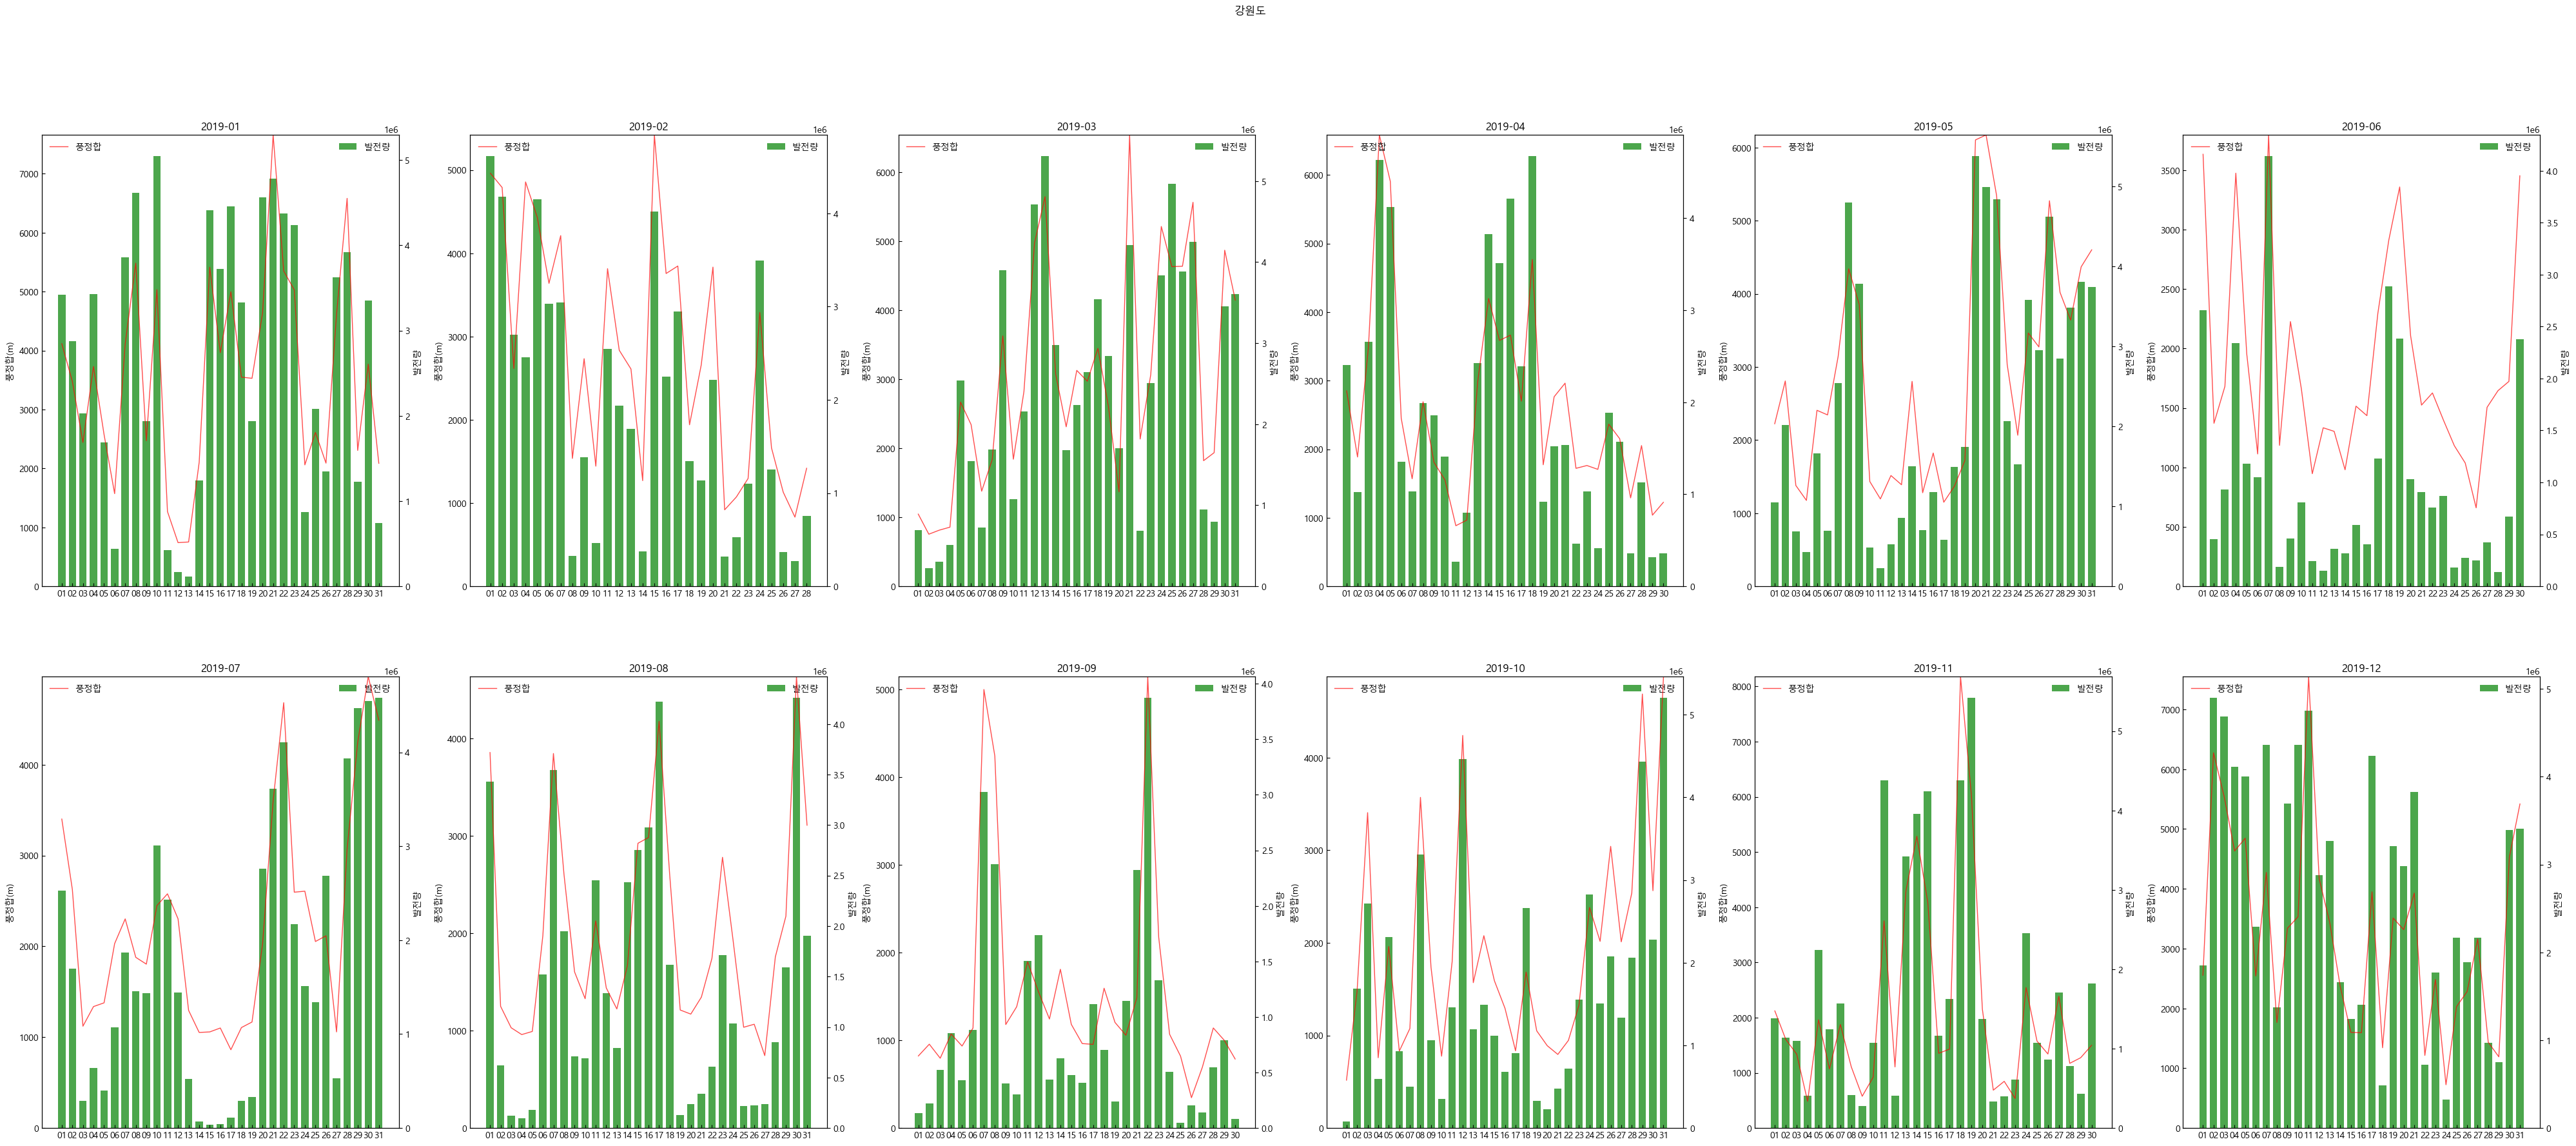

In [41]:
#월별
fix, ax = plt.subplots(2,6)
fix.suptitle(region1)
fix.set_size_inches(50,20)

for i in range(2):
    for j in range(6):
        m = (i*6) +(j+1)
        if (len(str(m)) <2):
            date = y +'-' + '0'+ str(m)
        else:
            date = y +'-' + str(m)
            
        temp = dpDay.index
        tempIndex = list(filter(lambda x:date in x, temp))
        #dp.loc[list(filter(lambda x:'2018' in x, temp))]

        #s1 = wDay.loc[wDay.일시.isin(tempIndex)]['평균 풍속(m/s)']
        ss1 = wDay.loc[wDay.일시.isin(tempIndex)]['풍정합(100m)']

        dpDay2 = dpDay.loc[tempIndex]
        dpDay2 = dpDay2.reset_index()
        dpDay2['거래일자'] = dpDay2.거래일자.apply(lambda x:x[-2:len(x)])

        x = dpDay2.거래일자
        

        ax[i,j].set_title(date)
        ax[i,j].set_ylim(0, ss1.max()+1)
        ax[i,j].set_ylabel('풍정합(m)')
        ax[i,j].tick_params(axis = 'both', direction= 'in')

        ax1 = ax[i,j].twinx()
        ax1.bar(x, dpDay2['발전량'], color = 'green', alpha = 0.7, width = 0.7, label = '발전량')
        ax1.set_ylabel('발전량')

        ax[i,j].plot(x, ss1, color = 'red', alpha = 0.7, linewidth = 1, label = '풍정합')

        ax[i,j].set_zorder(ax1.get_zorder() + 10)
        ax[i,j].patch.set_visible(False)

        ax[i,j].legend(loc='upper left',frameon = False)
        ax1.legend(loc='upper right',frameon = False)


plt.show()

In [36]:
# 분기별
fix, ax = plt.subplots(4,1)
fix.suptitle(region1)
fix.set_size_inches(100,100)

for i in range(4):
    tempIndex = []
    for j in range(3):
        m = (i*3) +(j+1)
        if (len(str(m)) <2):
            date = y +'-' + '0'+ str(m)
        else:
            date = y +'-' + str(m)
        #print(date)
        
        temp = dpDay.index
        tempIndex += (list(filter(lambda x:date in x, temp)))
        
    s1 = wDay.loc[wDay.일시.isin(tempIndex)]['평균 풍속(m/s)']
    ss1 = wDay.loc[wDay.일시.isin(tempIndex)]['풍정합(100m)']

    dpDay3 = dpDay.loc[tempIndex]
    dpDay3 = dpDay3.reset_index()

    x = wDay.loc[wDay.일시.isin(tempIndex)].일시

    #ax[i].set_title(date)
    ax[i].set_ylim(0, ss1.max()+1)
    ax[i].set_ylabel('풍정합(m)')
    ax[i].tick_params(axis = 'both', direction= 'in')

    ax1 = ax[i].twinx()
    ax1.bar(x, dpDay3['발전량'], color = 'green', alpha = 0.7, width = 0.7, label = '발전량')
    ax1.set_ylabel('발전량')

    ax[i].plot(x, ss1, color = 'red', alpha = 0.7, linewidth = 1, label = '풍정합')

    ax[i].set_zorder(ax1.get_zorder() + 10)
    ax[i].patch.set_visible(False)

    ax[i].legend(loc='upper left',frameon = False)
    ax1.legend(loc='upper right',frameon = False)


plt.show()